# 糖尿病预测（线性回归模型）

# 1 diabetes数据集

sklearn.datasets 包提供了一些小的数据集，可用于机器学习入门。其中，糖尿病（diabetes）数据集是一个经典的回归数据集，通常用于机器学习模型的训练和评估。

糖尿病数据集源于美国国立卫生研究院（National Institutes of Health, NIH），特别是由多位研究人员在糖尿病研究中收集的数据。

## 1.1 数据集内容

数据集一共包含 442 个样本，一共有 10 个特征，通常用于预测患者的糖尿病进展，如下：

1. `age`：年龄
2. `sex`：性别（0 = 女性, 1 = 男性）
3. `bmi`：身体质量指数（Body Mass Index）
4. `bp`：血压
5. `s1`：血浆胰岛素（第一种生物标志物）
6. `s2`：胰岛素的其他相关指标（第二种生物标志物）
7. `s3`：胰岛素的其他相关指标（第三种生物标志物）
8. `s4`：胰岛素的其他相关指标（第四种生物标志物）
9. `s5`：胰岛素的其他相关指标（第五种生物标志物）
10. `s6`：胰岛素的其他相关指标（第六种生物标志物）

要预测的内容：糖尿病进展评分，通常在 25 到 346 之间，值越高表示糖尿病进展越严重。

## 1.2 读取数据集

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes

In [11]:
# 获取diabetes数据集
diabetes = load_diabetes()
# 查看属性
print("数据形状:", diabetes.data.shape)  # 样本数和特征数
print("特征名称:", diabetes.feature_names)  # 特征名称
print("目标变量:", diabetes.target)  # 目标变量

数据形状: (442, 10)
特征名称: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
目标变量: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 

In [12]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [13]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## 1.3 可视化

- 使用直方图查看每个特征的分布情况

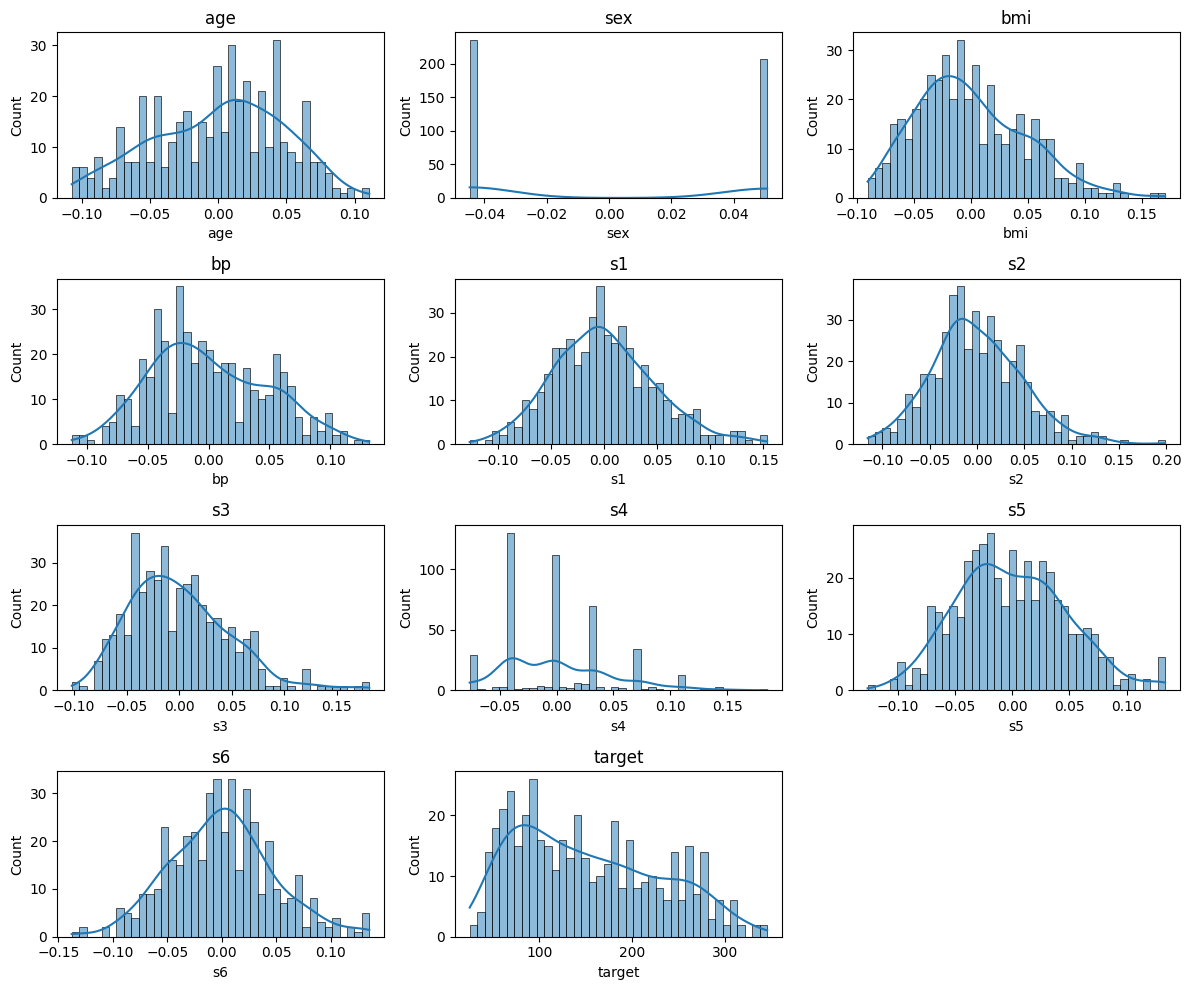

In [14]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(col)
plt.tight_layout()  # 自动调整子图参数，使其填充整个图像区域
plt.show()

- 使用散点图查看特征与目标变量之间的关系

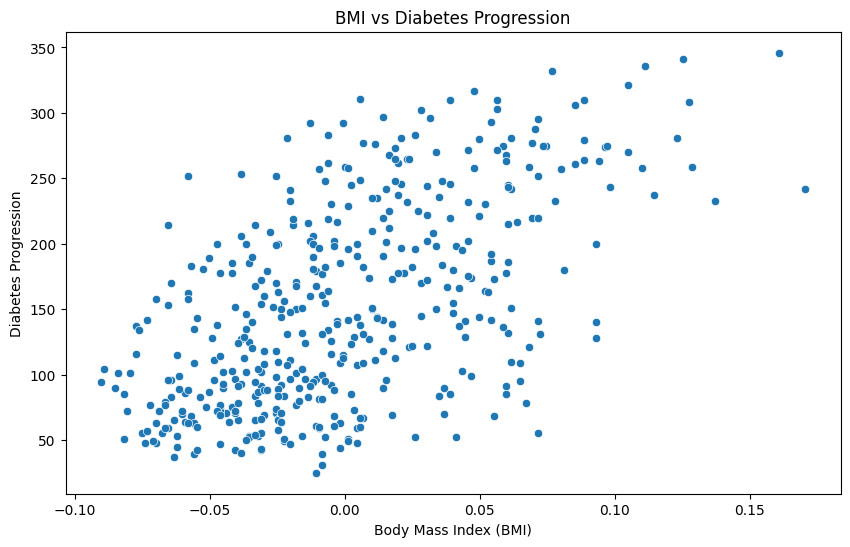

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='target', data=df)
plt.title('BMI vs Diabetes Progression')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression')
plt.show()

- 使用热力图查看各特征之间的相关性

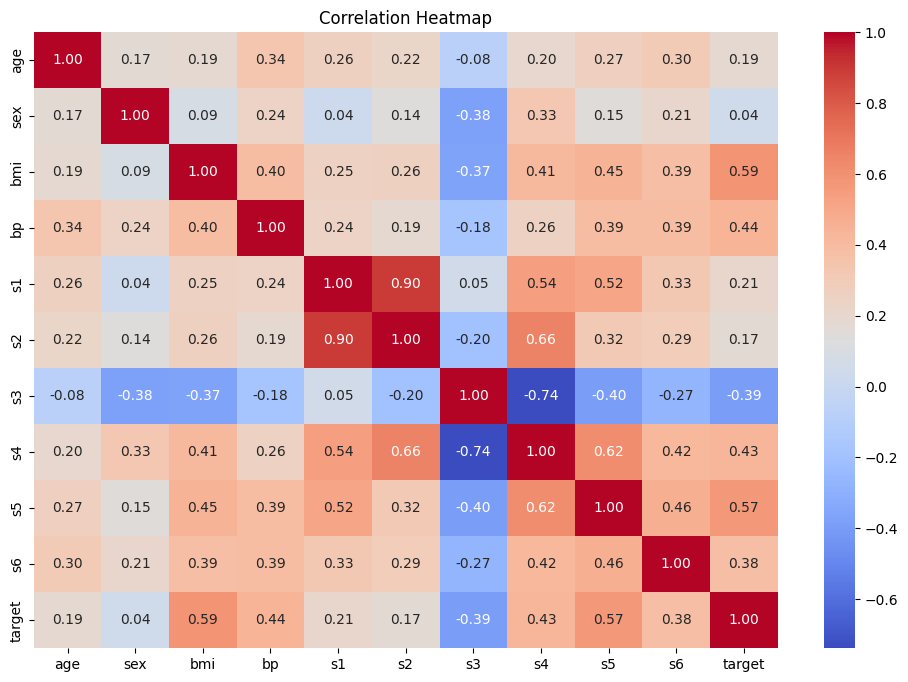

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

---

# 2 构建线性回归模型

In [17]:
# 获取输入和标签
data, target = diabetes.data, diabetes.target
data, target

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [24]:
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
X.shape[0]

442

In [30]:
# 按照 8∶2 划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
print("sample data:")
print("X train:", X_train[:3, :])
print("y train:", y_train[:3])
print("y_train's shape(before): ", y_train.shape)

sample data:
X train: [[-0.00551455 -0.04464164  0.05630715 -0.03665608 -0.04835136 -0.04296262
  -0.07285395  0.03799897  0.05078203  0.0569118 ]
 [-0.02004471 -0.04464164 -0.08488624 -0.02632753 -0.03596778 -0.03419447
   0.04127682 -0.05167075 -0.08237869 -0.04664087]
 [-0.06726771 -0.04464164 -0.05901875  0.03220094 -0.05110326 -0.04953874
  -0.01026611 -0.03949338  0.00200444  0.02377494]]
y train: [272.  90.  86.]
y_train's shape(before):  (353,)


In [31]:
# 导入线性回归模块
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# 定义模型实例
model = LinearRegression()
# 模型拟合训练数据
model.fit(X_train, y_train)
# 模型预测值
y_pred = model.predict(X_test)
# 输出模型均方误差
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# 计算 R2 系数
print('R Square score: %.2f' % r2_score(y_test, y_pred))
y_pred, y_test

Mean squared error: 3371.87
R Square score: 0.54


(array([ 83.48669522, 167.12395652, 111.44769208, 145.51383522,
        174.90328428, 132.9970007 , 131.11855647,  95.50024325,
        179.77068364, 146.50899807, 248.77103183, 223.37835202,
        232.78444707, 185.92256189, 108.8791261 , 144.12953663,
        125.2581975 , 233.87462243, 132.85687319, 121.76089495,
        100.86287198,  96.14392221, 214.2376464 , 163.88476179,
        262.45907842, 128.46368946, 222.33297508, 146.77350397,
        194.82347156, 170.53515483, 114.21289979, 158.49554138,
        175.81656153, 244.94076821, 191.93823553,  64.53858892,
        159.862375  , 104.46633143, 177.77716311, 255.52150554,
        182.58406667,  61.52437076, 219.66536408, 201.36171383,
        117.15425239, 165.27972052, 140.48207192,  98.27283214,
        144.00185339, 163.28038873, 164.8728943 , 156.95828385,
         77.96743695, 140.39424746, 176.58246148, 215.15870469,
        112.23129795, 173.26459858, 282.56882564,  82.62143109,
        107.34400077, 226.82285354, 161.

---

# 3 构建神经网络模型

In [13]:
import torch
from tqdm import tqdm
import torch.nn as nn

In [19]:
model = nn.Sequential(
    nn.Linear(10, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

optim = torch.optim.Adam(model.parameters(), lr=0.5)
loss = nn.MSELoss()

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

model.train()
for epoch in range(100):
    y_pred = model(X_train)
    l = loss(y_pred, y_train)
    optim.zero_grad()
    l.backward()
    optim.step()

    print(f"{epoch}: Mean squared error: {mean_squared_error(y_train, y_pred.detach().numpy())}")

0: Mean squared error: 28048.626953125
1: Mean squared error: 26754.46484375
2: Mean squared error: 24545.048828125
3: Mean squared error: 21279.267578125
4: Mean squared error: 17187.009765625
5: Mean squared error: 12665.2255859375
6: Mean squared error: 8316.0322265625
7: Mean squared error: 4975.35205078125
8: Mean squared error: 3633.80810546875
9: Mean squared error: 4848.43310546875
10: Mean squared error: 7268.71826171875
11: Mean squared error: 8418.140625
12: Mean squared error: 7739.06396484375
13: Mean squared error: 6095.17333984375
14: Mean squared error: 4439.8046875
15: Mean squared error: 3351.1123046875
16: Mean squared error: 2983.43701171875
17: Mean squared error: 3181.45458984375
18: Mean squared error: 3658.100830078125
19: Mean squared error: 4145.1123046875
20: Mean squared error: 4465.35400390625
21: Mean squared error: 4541.744140625
22: Mean squared error: 4377.16845703125
23: Mean squared error: 4030.85595703125
24: Mean squared error: 3598.146484375
25: Me

In [20]:
y_pred = model(X_test).detach().numpy()
# 输出模型均方误差
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# 计算 R2 系数
print('R Square score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3398.90
R Square score: 0.54
